In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
import umap


/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Allow printing more columns
pd.options.display.width = None
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)

In [3]:
# Do not show pandas warnings
pd.set_option('mode.chained_assignment', None)

In [4]:
df = pd.read_csv('./zadanie2_dataset.csv')

In [5]:
# Print the number of rows and columns
print("Number of rows and columns: ", df.shape)

Number of rows and columns:  (19237, 19)


In [6]:
df = df.drop(columns=['ID'])
df = df.drop(columns=['Levy'])
df = df.drop(columns=['Manufacturer'])
df = df.drop(columns=['Model'])

In [7]:
df = df[(df['Cylinders'] > 3) & (df['Cylinders'] < 13)]
df = df[(df['Price'] >= 500) & (df['Price'] <= 100000)]
df = df[(df['Prod. year'] >= 1992)]
df = df[(df['Engine volume'] >= 1) & (df['Engine volume'] <= 10)]
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)
df = df[(df['Mileage'] >= 0) & (df['Mileage'] <= 500000)]

In [8]:
# Convert boolean columns 'Turbo engine' and 'Left wheel' to int
df['Turbo engine'] = df['Turbo engine'].astype(int)
df['Left wheel'] = df['Left wheel'].astype(int)
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})

In [9]:
# print all columns
print(df.columns)

Index(['Price', 'Prod. year', 'Category', 'Leather interior', 'Fuel type',
       'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Color', 'Airbags', 'Turbo engine',
       'Left wheel'],
      dtype='object')


In [10]:
df = pd.get_dummies(df, columns=['Color'])
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Fuel type'])
df = pd.get_dummies(df, columns=['Gear box type'])
df = pd.get_dummies(df, columns=['Drive wheels'])
df = pd.get_dummies(df, columns=['Doors'])

In [11]:
# remove duplicate rows
df = df.drop_duplicates()

In [12]:
# print the number of rows and columns
print("Number of rows and columns: ", df.shape)

Number of rows and columns:  (14176, 53)


In [13]:
# count the number of null values in each column
print(df.isnull().sum())

Price                       0
Prod. year                  0
Leather interior            0
Engine volume               0
Mileage                     0
Cylinders                   0
Airbags                     0
Turbo engine                0
Left wheel                  0
Color_Beige                 0
Color_Black                 0
Color_Blue                  0
Color_Brown                 0
Color_Carnelian red         0
Color_Golden                0
Color_Green                 0
Color_Grey                  0
Color_Orange                0
Color_Pink                  0
Color_Purple                0
Color_Red                   0
Color_Silver                0
Color_Sky blue              0
Color_White                 0
Color_Yellow                0
Category_Cabriolet          0
Category_Coupe              0
Category_Goods wagon        0
Category_Hatchback          0
Category_Jeep               0
Category_Limousine          0
Category_Microbus           0
Category_Minivan            0
Category_P

In [14]:
# print all columns
print(df.columns)

Index(['Price', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage',
       'Cylinders', 'Airbags', 'Turbo engine', 'Left wheel', 'Color_Beige',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red',
       'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver',
       'Color_Sky blue', 'Color_White', 'Color_Yellow', 'Category_Cabriolet',
       'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback',
       'Category_Jeep', 'Category_Limousine', 'Category_Microbus',
       'Category_Minivan', 'Category_Pickup', 'Category_Sedan',
       'Category_Universal', 'Fuel type_CNG', 'Fuel type_Diesel',
       'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid',
       'Gear box type_Automatic', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_4x4',
       'Drive wheels_Front', 'Dri

In [15]:
X = df.drop(columns=['Price'])
y = df['Price']

In [16]:
y

0        13328.0
1        16621.0
2         8467.0
3         3607.0
4        11726.0
          ...   
19225     8781.0
19226     7840.0
19232     8467.0
19233    15681.0
19234    26108.0
Name: Price, Length: 14176, dtype: float64

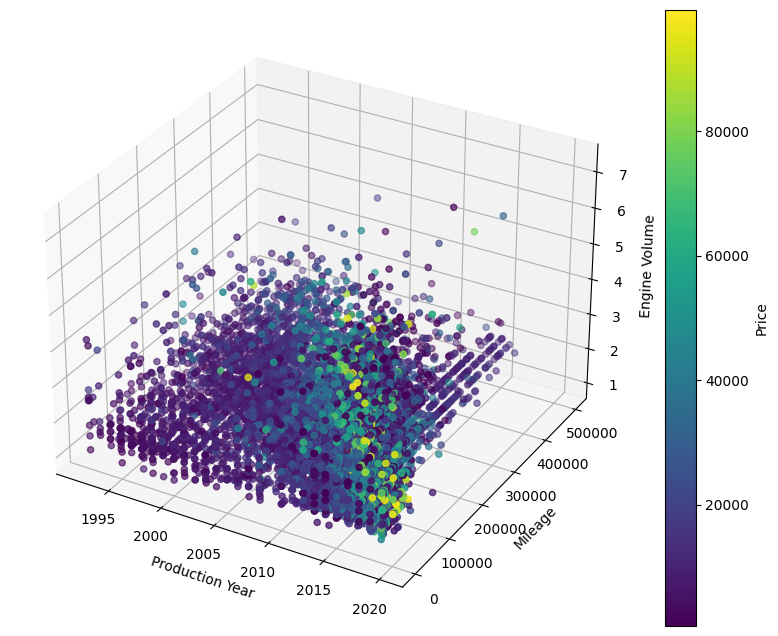

In [17]:
# Assuming 'df' is your DataFrame with the car data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using 'Prod. year', 'Mileage', and 'Engine volume' as axes
sc = ax.scatter(df['Prod. year'], df['Mileage'], df['Engine volume'], c=df['Price'], cmap='viridis')

# Adding labels
ax.set_xlabel('Production Year')
ax.set_ylabel('Mileage')
ax.set_zlabel('Engine Volume')

# Adding a color bar to represent price
cbar = plt.colorbar(sc)
cbar.set_label('Price')

plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=69)

In [19]:
# Standardize data
scaler = StandardScaler()
# !!!!!
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [20]:
# Convert numpy arrays to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_valid = pd.DataFrame(X_valid, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [21]:
# Initialize the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=8)

In [22]:
# Fit the model to the training data
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [23]:
# Evaluate the model
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)

In [24]:
# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [25]:
# Print metrics
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R2 Score: {train_r2}, Test R2 Score: {test_r2}")

Train MSE: 73977181.89340228, Test MSE: 92176367.76433286
Train R2 Score: 0.692200100920269, Test R2 Score: 0.5929146758114427


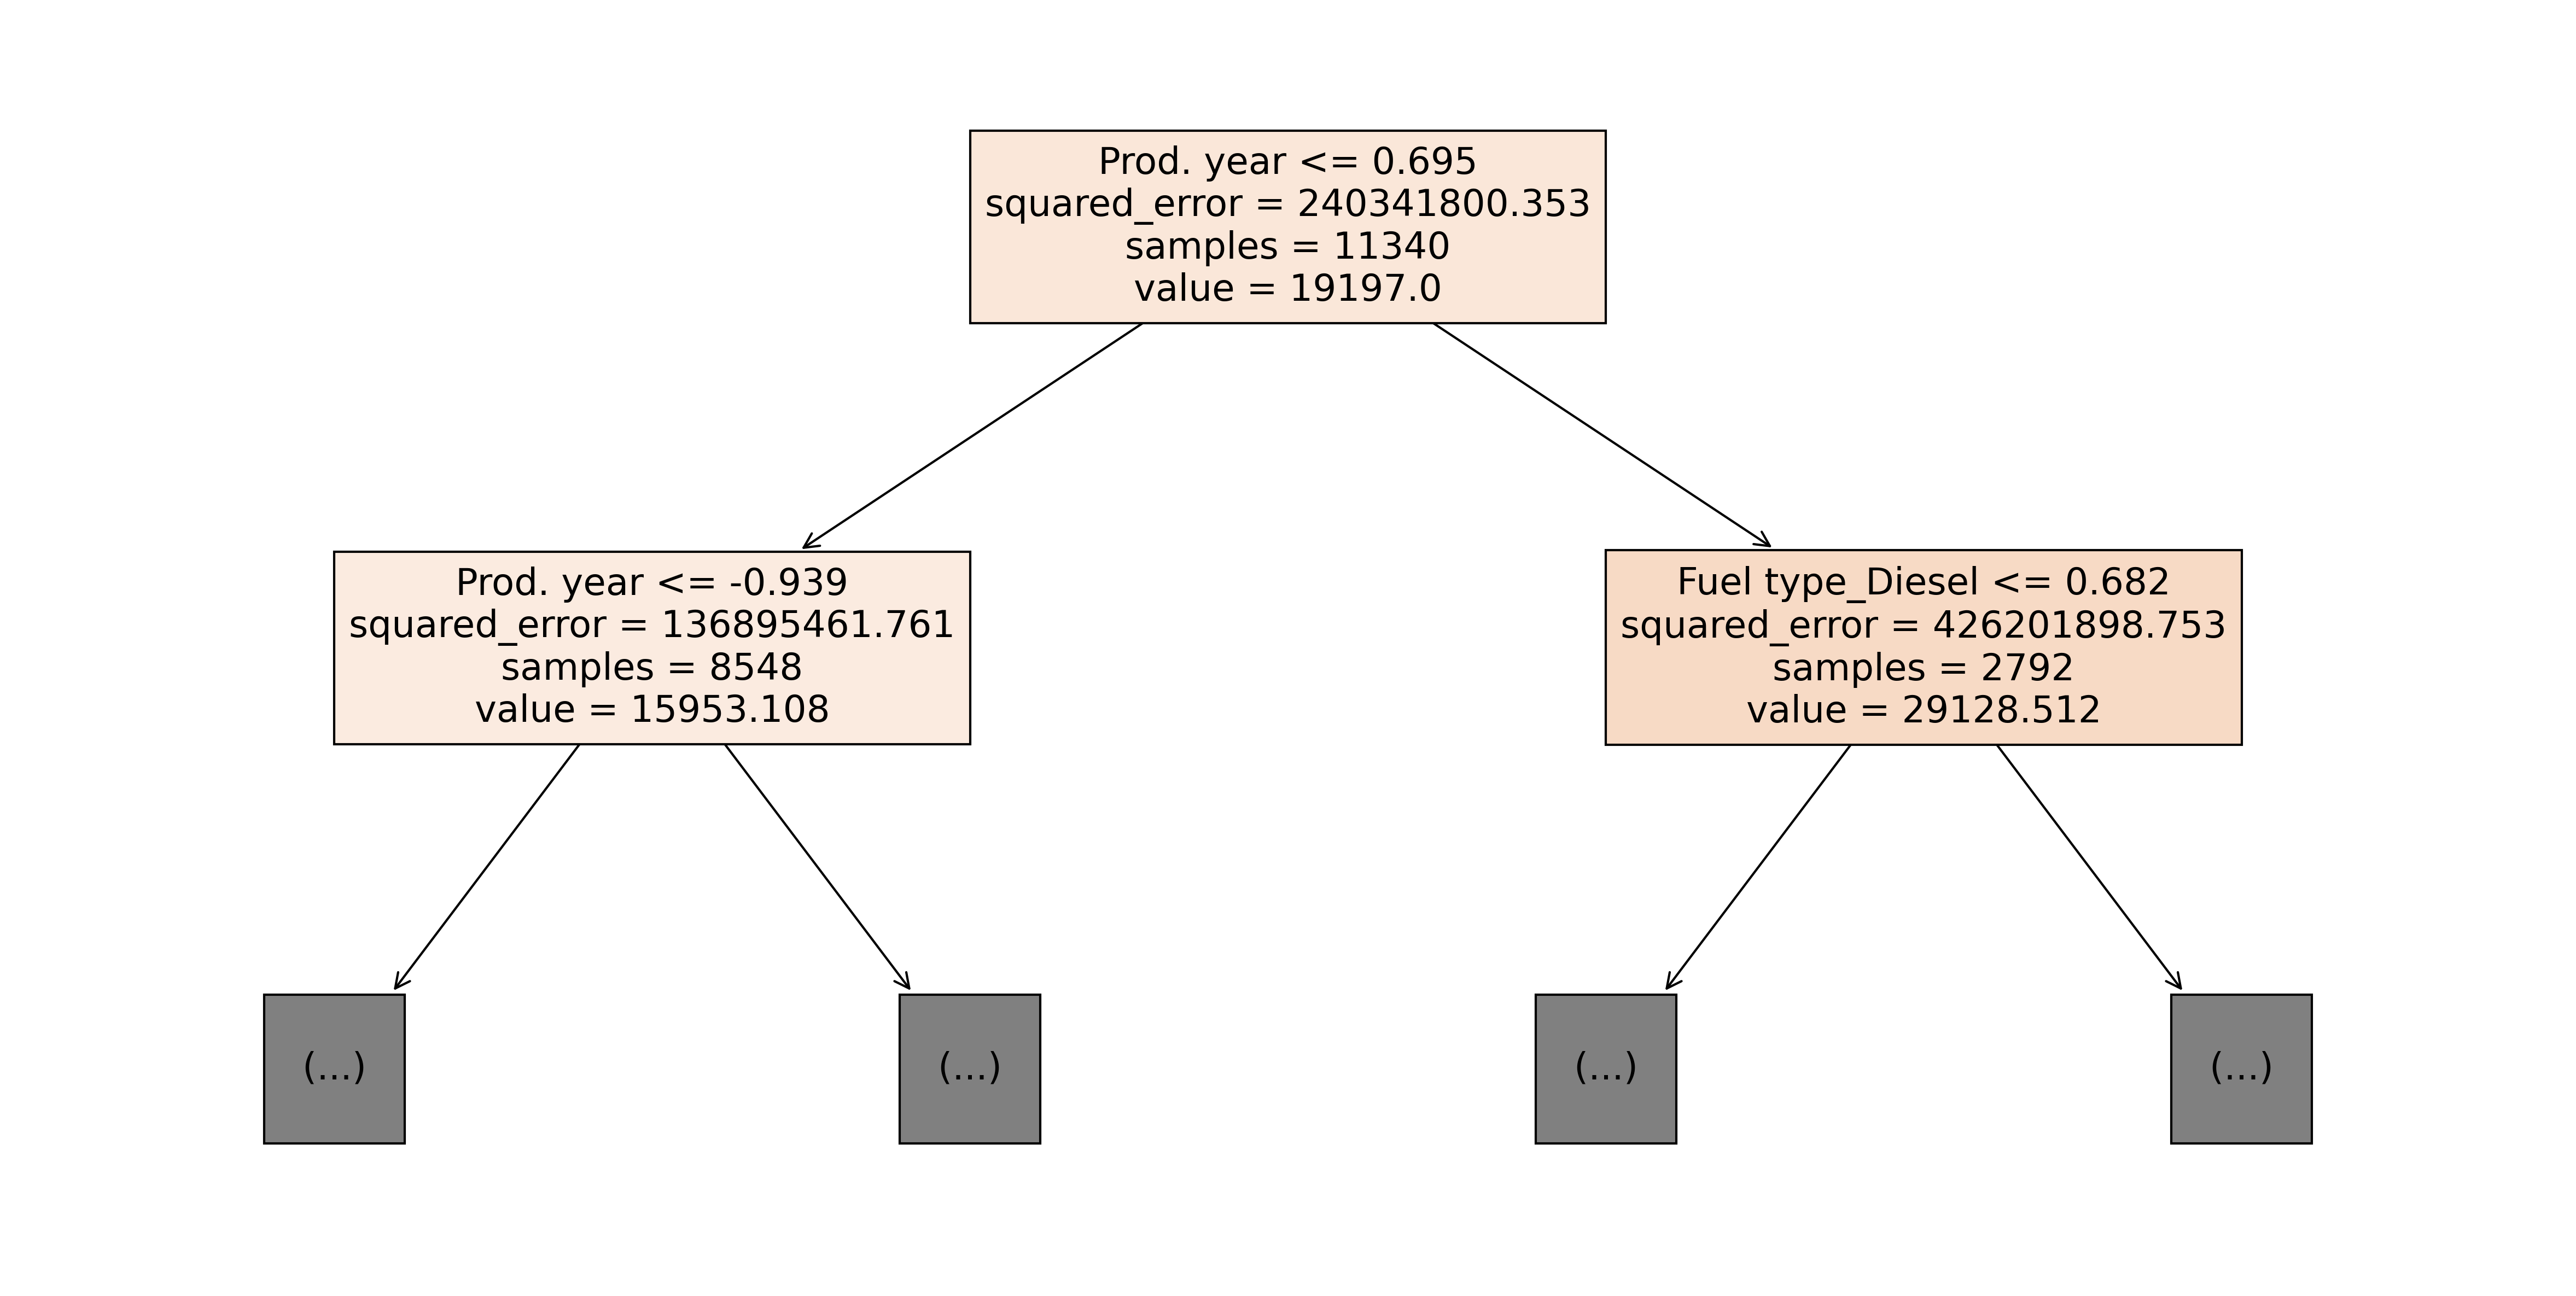

In [26]:
# Visualize the Decision Tree (only if the tree is not too large)
plt.figure(figsize=(20,10), dpi=300)
plot_tree(dt_reg, filled=True, feature_names=X_train.columns, max_depth=1)
plt.show()

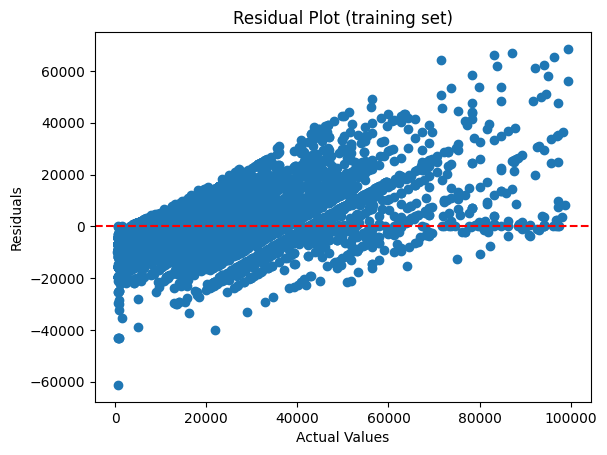

In [27]:
residuals = y_train - y_train_pred
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (training set)")
plt.show()

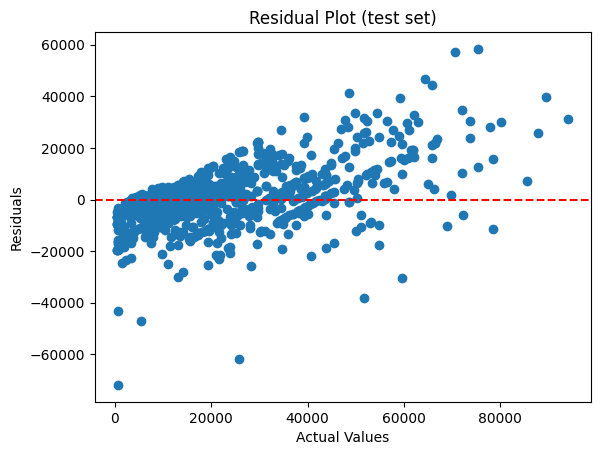

In [28]:
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (test set)")
plt.show()

In [29]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=8)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R2 Score: {train_r2}, Test R2 Score: {test_r2}")

# Feature Importance
feature_importance = pd.Series(rf_reg.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')  # Plot top 10 important features
# name the plot and axes
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


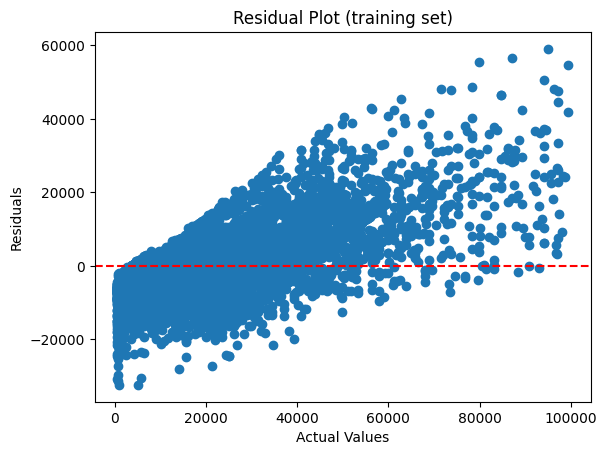

In [ ]:
residuals = y_train - y_train_pred
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (training set)")
plt.show()

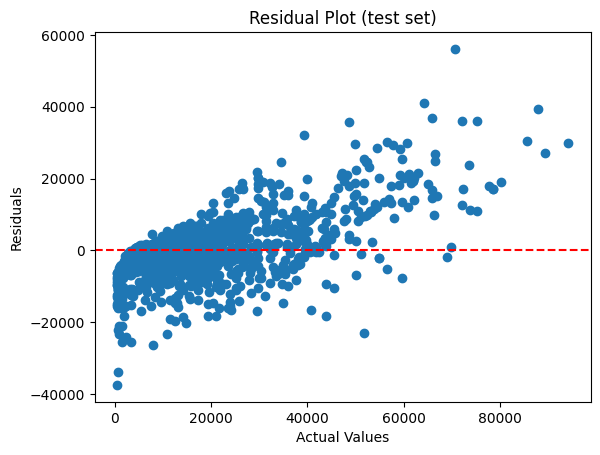

In [ ]:
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (test set)")
plt.show()

In [ ]:
# Initialize the Support Vector Regression model
svm_model = SVR(kernel='linear') # parametre vygeneroval copilot, predpokladam, ze su to nejake "defaultne" parametre

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R2 Score: {r2_train}, Test R2 Score: {r2_test}")


Train MSE: 181857684.0861877, Test MSE: 172694376.04258895
Train R2 Score: 0.24333726460058047, Test R2 Score: 0.23731702862736737


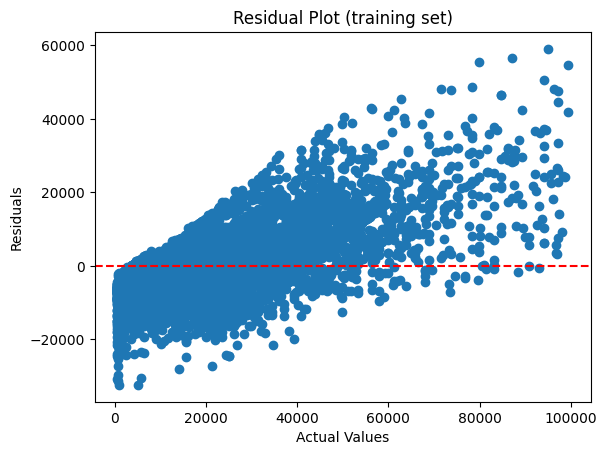

In [ ]:
residuals = y_train - y_train_pred
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (training set)")
plt.show()

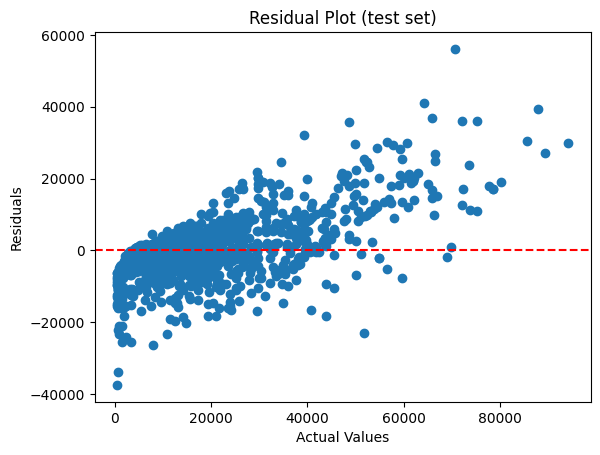

In [ ]:
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (test set)")
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame
fig = px.scatter_3d(df, 
                    x='Prod. year', 
                    y='Mileage', 
                    z='Engine volume', 
                    color='Price', # Coloring points by Price
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='3D Scatter Plot of Cars')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [ ]:
import plotly.express as px

reducer = umap.UMAP(n_components=3)  # Reduce to 3 dimensions
X_train_umap = reducer.fit_transform(X_train)
X_valid_umap = reducer.transform(X_valid)
X_test_umap = reducer.transform(X_test)


import plotly.express as px

fig = px.scatter_3d(
    x=X_train_umap[:, 0], 
    y=X_train_umap[:, 1],
    z=X_train_umap[:, 2], 
    color=y_train,  # Assuming y_train contains the labels or some continuous value
    labels={'x': 'UMAP 1', 'y': 'UMAP 2', 'z': 'UMAP 3', 'color': 'Price'} 
)

fig.show()

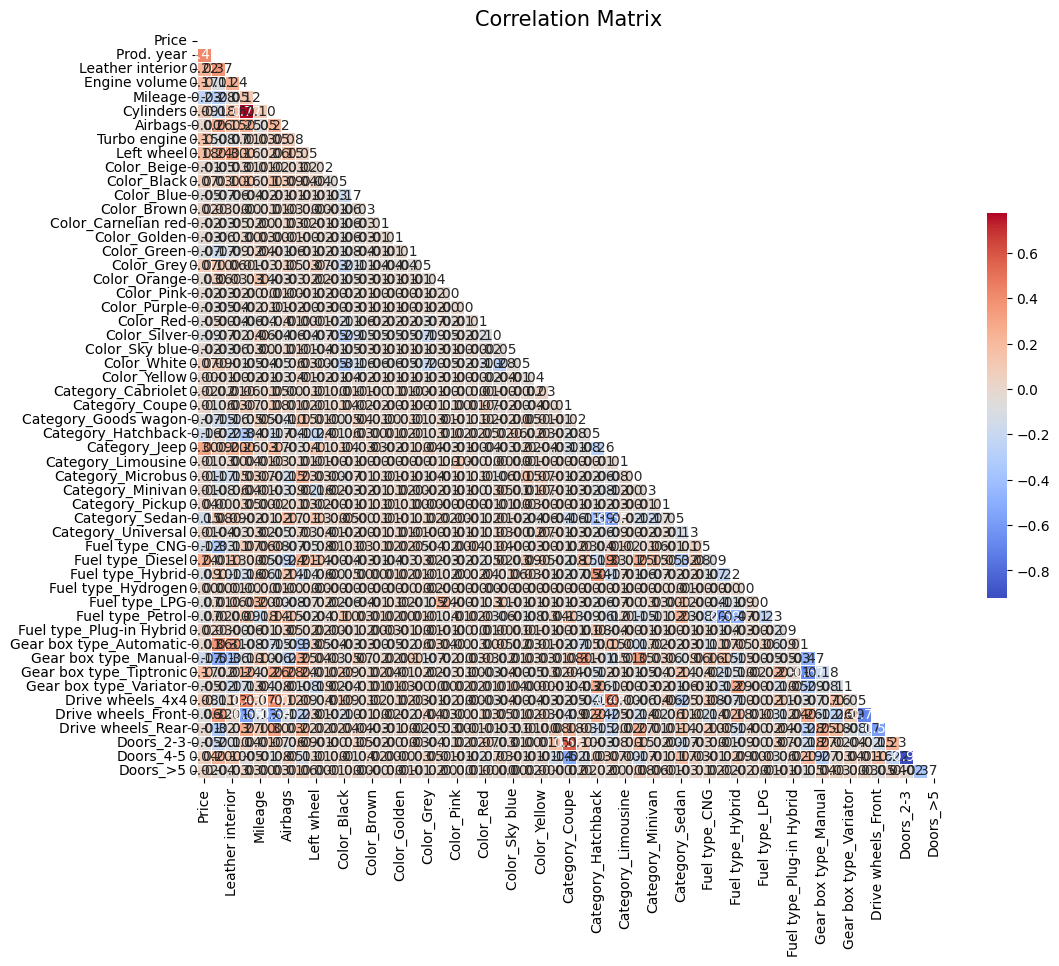

In [ ]:
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', size=15)
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame
corr_matrix = df.corr()

# Extract correlations with 'Price'
price_correlations = corr_matrix['Price'].drop('Price')  # Exclude self-correlation

# Sort the correlations
sorted_correlations = price_correlations.sort_values(key=abs, ascending=False)

# Get top 10 positive correlations with 'Price'
top10_positive = sorted_correlations[sorted_correlations > 0].head(10)

# Get top 10 negative correlations with 'Price'
top10_negative = sorted_correlations[sorted_correlations < 0].head(10)

print("Top 10 Positive Correlations with Price:")
print(top10_positive)

print("\nTop 10 Negative Correlations with Price:")
print(top10_negative)


Top 10 Positive Correlations with Price:
Prod. year                 0.411976
Category_Jeep              0.298132
Fuel type_Diesel           0.243400
Leather interior           0.220339
Left wheel                 0.182578
Engine volume              0.168520
Gear box type_Tiptronic    0.167531
Turbo engine               0.148471
Cylinders                  0.091097
Drive wheels_4x4           0.082592
Name: Price, dtype: float64

Top 10 Negative Correlations with Price:
Mileage                -0.228300
Gear box type_Manual   -0.165252
Category_Hatchback     -0.158923
Category_Sedan         -0.151534
Fuel type_CNG          -0.121046
Fuel type_Hybrid       -0.094717
Color_Silver           -0.092871
Category_Goods wagon   -0.072719
Color_Green            -0.071864
Fuel type_Petrol       -0.068404
Name: Price, dtype: float64


Train MSE: 69998804.70275164, Test MSE: 98488342.91680422
Train R2 Score: 0.7087530982965125, Test R2 Score: 0.5650386321623441


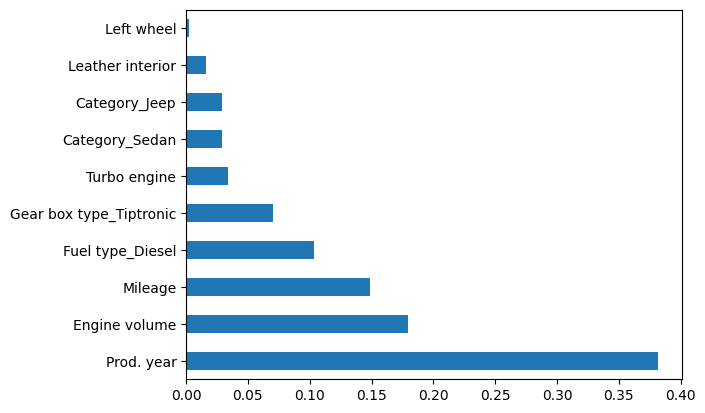

In [ ]:
# Selecting the features with the biggest positive and negative correlations
selected_features = [
    'Prod. year', 'Category_Jeep', 'Fuel type_Diesel', 'Leather interior', 'Mileage'
]

selected_features = [
    'Prod. year', 'Category_Jeep', 'Fuel type_Diesel', 'Leather interior', 'Mileage',
    'Left wheel', 'Engine volume', 'Gear box type_Tiptronic', 'Turbo engine',
    'Gear box type_Manual', 'Category_Hatchback', 'Category_Sedan', 'Fuel type_CNG'
]


# Creating a new DataFrame with the selected features and the target variable 'Price'
new_df = df[selected_features + ['Price']]

# Display the first few rows of the new dataset
# print(new_df.head())

# grab all boolean columns and convert them to int
bool_columns = df.select_dtypes(include='bool').columns

X = new_df.drop(columns=['Price'])
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=69)

# Standardize data
scaler = StandardScaler()
# !!!!!
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Convert numpy arrays to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_valid = pd.DataFrame(X_valid, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=256, random_state=42, max_depth=10)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R2 Score: {train_r2}, Test R2 Score: {test_r2}")

# Feature Importance
feature_importance = pd.Series(rf_reg.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')  # Plot top 10 important features
plt.show()


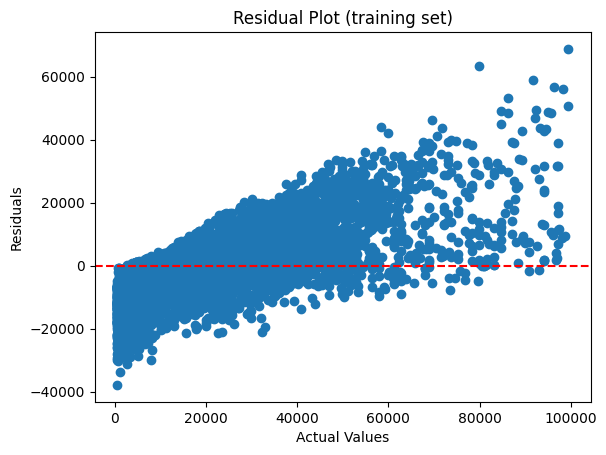

In [ ]:
residuals = y_train - y_train_pred
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (training set)")
plt.show()

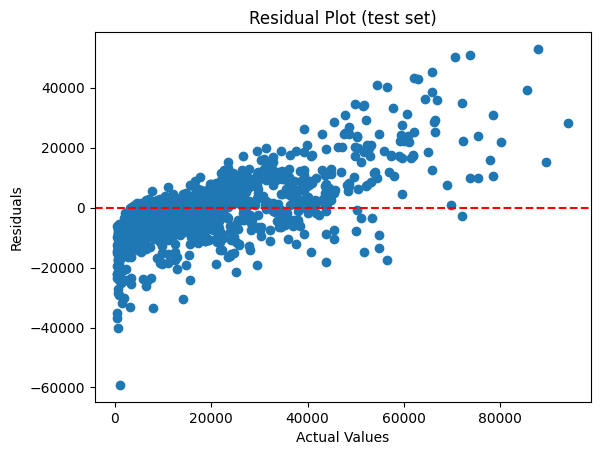

In [ ]:
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (test set)")
plt.show()

In [ ]:
# Selecting the features with the biggest positive and negative correlations
selected_features = [
    'Prod. year', 'Engine volume', 'Mileage'
]


# Creating a new DataFrame with the selected features and the target variable 'Price'
new_df = df[selected_features + ['Price']]

# Display the first few rows of the new dataset
print(new_df.head())

# grab all boolean columns and convert them to int
bool_columns = df.select_dtypes(include='bool').columns

X = new_df.drop(columns=['Price'])
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=69)

# Standardize data
scaler = StandardScaler()
# !!!!!
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Convert numpy arrays to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_valid = pd.DataFrame(X_valid, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=256, random_state=42, max_depth=10)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R2 Score: {train_r2}, Test R2 Score: {test_r2}")
plt.show()


   Prod. year  Engine volume  Mileage    Price
0        2010            3.5   186005  13328.0
1        2011            3.0   192000  16621.0
2        2006            1.3   200000   8467.0
3        2011            2.5   168966   3607.0
4        2014            1.3    91901  11726.0
Train MSE: 107972629.44330116, Test MSE: 147199724.73774755
Train R2 Score: 0.5507538460452588, Test R2 Score: 0.34991094660469835


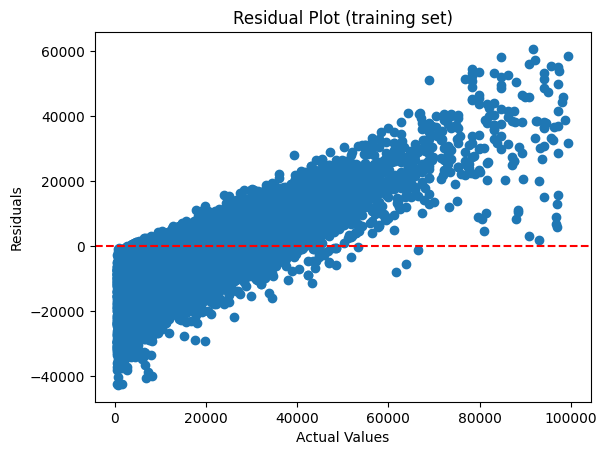

In [ ]:
residuals = y_train - y_train_pred
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (training set)")
plt.show()

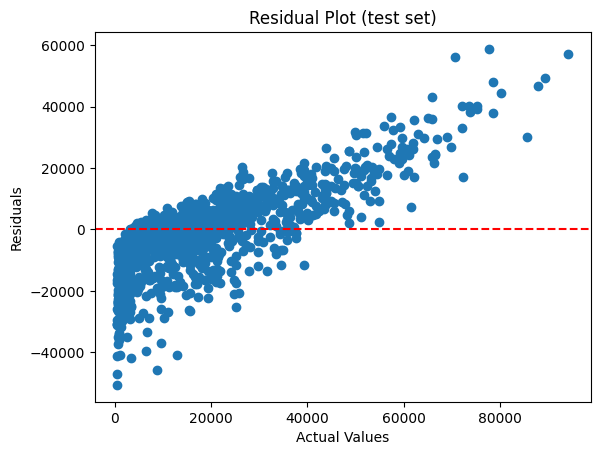

In [ ]:
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (test set)")
plt.show()

In [ ]:
# Initialize PCA with a variance threshold instead of a fixed number of components
variance_threshold = 0.9  # For example, to retain 95% of the variance
pca = PCA(n_components=variance_threshold)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

# Check how many components were chosen to retain the specified variance
print(f"Number of components chosen to retain {variance_threshold*100}% variance: {pca.n_components_}")


Number of components chosen to retain 90.0% variance: 3


In [ ]:
# Assuming you've already performed PCA as discussed in the previous step
# and have your PCA-transformed data in X_train_pca, X_valid_pca, and X_test_pca

# Convert numpy arrays to pandas DataFrames
# Note: The column names here are just placeholders (PC1, PC2, PC3) representing the principal components
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3'])
X_valid_pca_df = pd.DataFrame(X_valid_pca, columns=['PC1', 'PC2', 'PC3'])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2', 'PC3'])

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=256, random_state=42, max_depth=10)

# Fit the model to the training data (using PCA-transformed data)
rf_reg.fit(X_train_pca_df, y_train)

# Predict on train and test sets (using PCA-transformed data)
y_train_pred = rf_reg.predict(X_train_pca_df)
y_test_pred = rf_reg.predict(X_test_pca_df)

# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R2 Score: {train_r2}, Test R2 Score: {test_r2}")


Train MSE: 103944519.96081464, Test MSE: 160001547.44352385
Train R2 Score: 0.5675137666107384, Test R2 Score: 0.2933733082404981


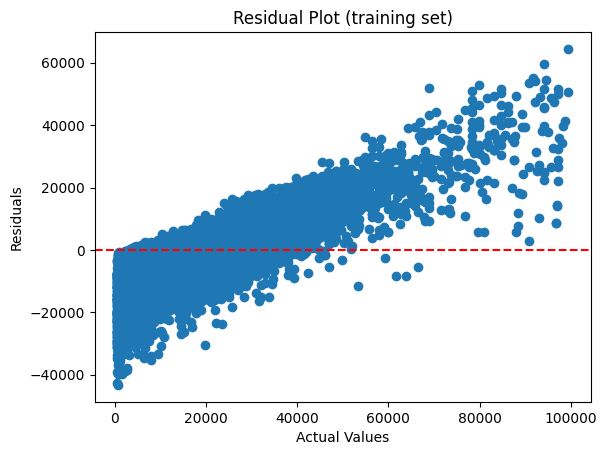

In [ ]:
residuals = y_train - y_train_pred
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (training set)")
plt.show()

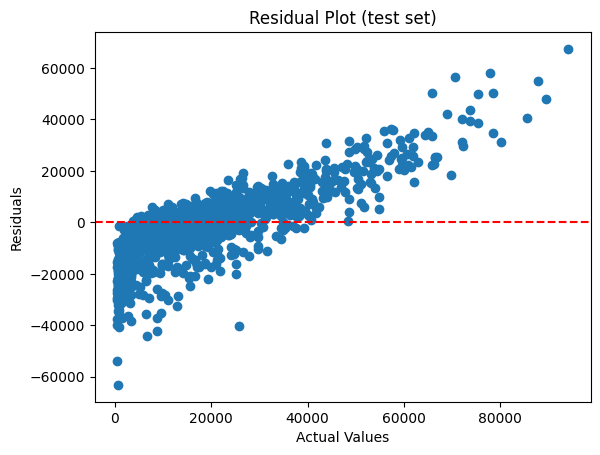

In [ ]:
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (test set)")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
numeric_features = df[['Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']]
binary_features = df[['Leather interior', 'Turbo engine']]
features_for_clustering = pd.concat([numeric_features, binary_features], axis=1)

clusters = kmeans.fit_predict(features_for_clustering)

# Add clusters to dataframe
features_for_clustering['cluster'] = clusters

fig = px.scatter_3d(features_for_clustering, 
                    x='Prod. year', 
                    y='Engine volume', 
                    z='Mileage',
                    color='cluster')
fig.update_layout(width=800, height=800)
fig.show()


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

